In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import pandas as pd
import numpy as np
import tensorflow as tf

In [23]:
a = [1,2,43]
b = a.pop()
a

[1, 2]

In [6]:
flags = (data != 0.).astype(np.float32)

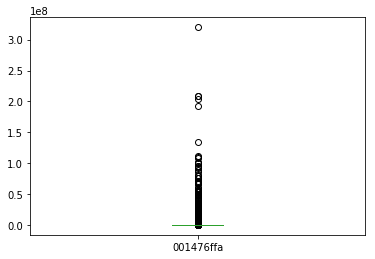

In [14]:
data['001476ffa'].plot(kind='box')

In [13]:
data.max().astype(int)

001476ffa     320044480
0019109c4     301312000
0022de2b3     363991424
0024cd760     209374000
002d634dc     169206032
00302fe51     360000000
003da5628     256389840
006e72749     238614768
007d71f12     585197120
007ee91d1     175197616
009319104     843401984
009990be1     241980096
00b309c64     182000000
00c467392     320000000
00e87edf2     410860256
00ebe887d     282241440
00f844fea     911204416
00fcf67e4     175027808
01005e5de     498609408
0106dd950     319403360
013127235     504916096
014574363     190048512
01599af81     882258624
015c3e354     165924032
01816048b     183358656
0186620d7     327315488
018ab6a80     505000000
018d6afbb     200000000
018f23166     159768736
0196d5172     278806848
                ...    
feb40ad9f     404756000
fec5644cf     564245248
fec5eaf1a     258199488
fed0df103     271063392
fed5f4046     460538304
fee2d3bf9     350127776
feeb05b3f     436769536
feed9d437     243084192
ff08cfbbe    1172294656
ff1551a48     244532096
ff2c9aa8f     20

In [3]:
#loged_data = np.log(data+1)

In [8]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

result = {}
for n_components in [8, 16, 32, 64, 128]:
    print(n_components)
    pca = PCA(n_components=n_components)
    pca.fit(data)
    transformed = pca.transform(data)
    reconstruction_loged = pca.inverse_transform(transformed)
    reconstruction = reconstruction_loged#np.exp(reconstruction_loged)
    result[n_components] = mean_squared_error(data, reconstruction)


In [10]:
total_result = pd.DataFrame()
total_result['PCA'] = pd.Series(result)
total_result['Autoencoder'] = (pd.Series(result) - .1)
total_result.index.name = 'Dimention of Z'

In [15]:
total_result.to_hdf('results/total_result.h5', key='data')

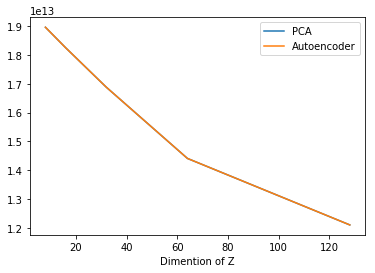

In [11]:
total_result.plot()